In [26]:
# Импортируем пандас, чтобы работать с таблицами
import pandas
# Загружаем таблицу и берем оттуда только одну колонку
rates = pandas.read_excel("usd_rates.xlsx").curs
# Введем переменные для количества дней для обучения и прогноза
past = 30
future = 7
# Введем переменные для начала и конца в зависимости от первых переменных
start = past
end = len(rates)-future
print(f"Берем дни с {start} по {end}")
# Создадим новую таблицу с нашими диапазонами
table = []
for i in range(start, end):
    s = rates[(i - past):(i + future)]    
    table.append(list(s))

Берем дни с 30 по 733


In [31]:
# Сгенерим имена колонок с прошлыми результатами
past_col = []
for i in range(past):
    past_col.append(f"past_{i}")

In [47]:
# Сгенерим имена колонок для будущего
future_col = []
for i in range(future):
    future_col.append(f"future_{i}")

In [48]:
# Создадим таблицу с новыми колонками на базе таблицы с интервалами
df = pandas.DataFrame(table, columns=(past_col + future_col))

In [94]:
# Обучающая выборка
X = df[past_col][:-10]
Y = df[future_col][:-10]
# Проверочная выборка
X_test = df[past_col][-10:]
Y_test = df[future_col][-10:]

In [125]:
# Выберем модель для обучения
#from sklearn.tree import DecisionTreeRegressor
#DTR = DecisionTreeRegressor()
#DTR.fit(X, Y)

#from sklearn.compose import TransformedTargetRegressor
#TTR = TransformedTargetRegressor()
#TTR.fit(X, Y)

#from sklearn.kernel_ridge import KernelRidge
#KR = KernelRidge()
#KR.fit(X, Y)

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(200, 200, 200, 200), max_iter=1000, random_state=42)
MLP.fit(X, Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(200, 200, 200, 200), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [96]:
# импортируем библиотеки для графиков и расчета средней ошибки
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

Day 0, err 0.35829550749113637


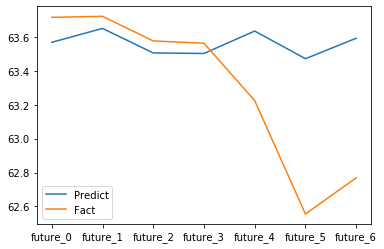

Day 1, err 0.4666679749004225


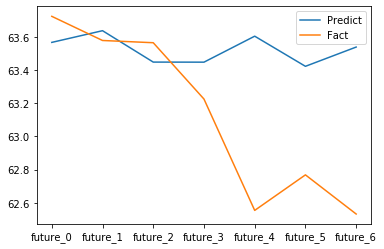

Day 2, err 0.5585393324759055


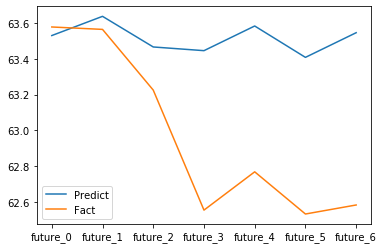

Day 3, err 0.675337910315602


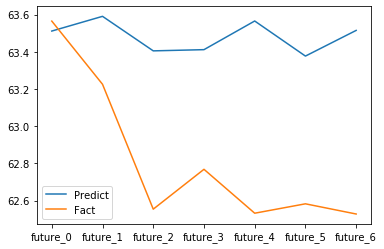

Day 4, err 0.82714164401752


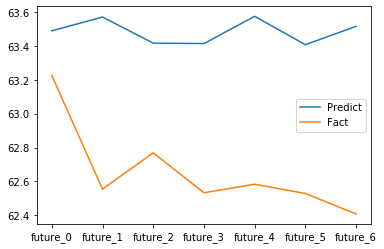

Day 5, err 0.8037818498492929


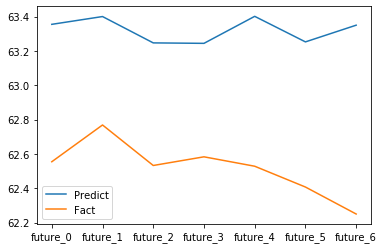

Day 6, err 0.7153809761231591


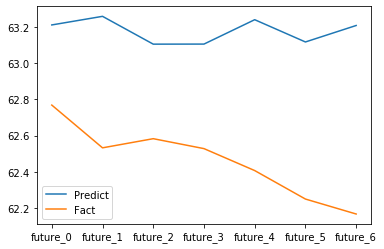

Day 7, err 0.779016740089242


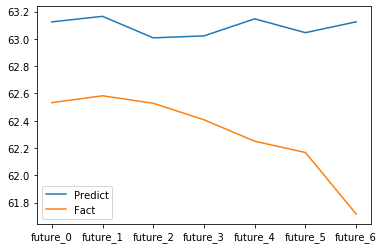

Day 8, err 0.7446677851833304


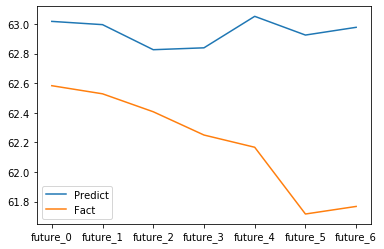

Day 9, err 0.649424837227122


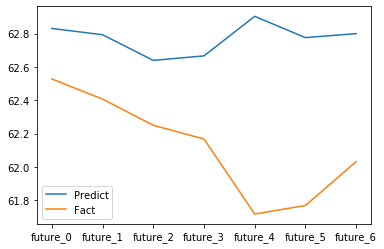

In [127]:
for i in range(10):
    # Предсказываем модель
    #predict = DTR.predict([X_test.iloc[i]])
    #predict = TTR.predict([X_test.iloc[i]])
    #predict = KR.predict([X_test.iloc[i]])
    predict = MLP.predict([X_test.iloc[i]])
    # Считаем ошибку
    err = mean_absolute_error(predict[0], Y_test.iloc[i])
    print(f"Day {i}, err {err}")
    # Печатаем график
    plt.plot(predict[0], label = "Predict")
    plt.plot(Y_test.iloc[i], label = "Fact")
    plt.legend()
    plt.show()